<a href="https://colab.research.google.com/github/kirubanath/ML_learnings/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 3:

Importing necessary libraries:

In [ ]:
import numpy as np
import PIL as pil
from PIL import Image

For the SVD I am using the Einstein image that i downloaded, this can be any image!

In [ ]:
im = Image.open("ein.jpeg")

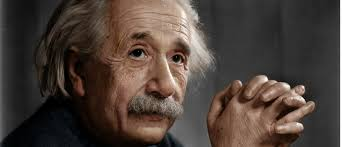

In [ ]:
display(im)

This is a 3D image so first lets convert it into 2D:

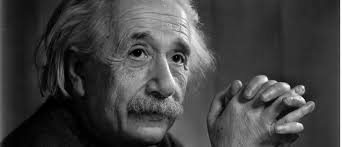

In [ ]:
grey_im = im.convert('L')
display(grey_im)

This is the original Image. Now first lets convert it into numpy array to perform SVD

In [ ]:
Im_array = np.asarray(grey_im)
Im_array.shape

(147, 342)

As we can see it is now a 2D matrix with shape 147 x 342

Let us now perfom SVD

In [ ]:
U,svs,V = np.linalg.svd(Im_array)

In [ ]:
U.shape

(147, 147)

In [ ]:
svs.shape

(147,)

In [ ]:
V.shape

(342, 342)

Now that we have done SVD let us set the lowest 70% of the singular values as zeros

There are 147 values so the 30% of it is 54 values

(The singualar values are already sorted in descending order!)

In [ ]:
#initializing sigma matrix
Sigma = np.zeros(Im_array.shape)

In [ ]:
for i in range(int(0.3*Im_array.shape[0])):
    Sigma[i,i] = svs[i]

Now the sigma matrix has only 30% of the top singular values. Rest are set to zero.

Let us now for the compressed image!

In [ ]:
com_array = U@Sigma@V
com_im = Image.fromarray(com_array).convert('L').save('1.png')


oringinal Image:


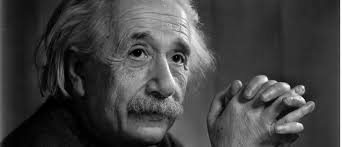


70% compressed Image


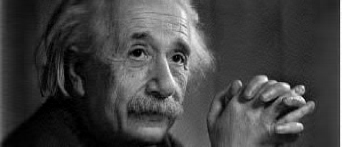

In [ ]:
im = Image.open('1.png')
print("oringinal Image:")
display(grey_im)
print()
print("70% compressed Image")
display(im)


There is no noticeable difference other than slight blurr! 

oringinal Image:


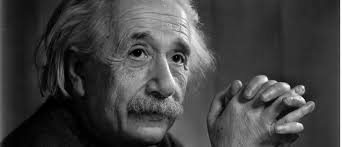


70% compressed Image


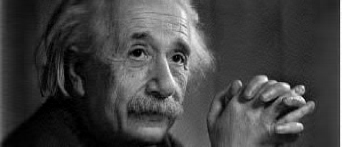


95% compressed Image


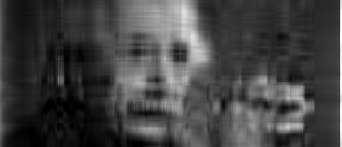

In [ ]:
#when the reduction is by 95%
Sigma2 = np.zeros(Im_array.shape)
for i in range(int(0.05*Im_array.shape[0])):
    Sigma2[i,i] = svs[i]
com_array2 = U@Sigma2@V
com_im2 = Image.fromarray(com_array2).convert('L').save('2.png')

im = Image.open('1.png')
print("oringinal Image:")
display(grey_im)
print()
print("70% compressed Image")
display(im)

print()
print("95% compressed Image")
im2 = Image.open('2.png')
display(im2)